Load libraries and intialize Reddit information for scraping

In [9]:
import praw
from praw.models import MoreComments
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read-only instance
reddit_read_only = praw.Reddit(client_id="NLmlqyOFw4rPxtoQOairnA",         # your client id
                               client_secret="nqhj6EKit-r65-nYU8x56pf6fXjc4A",      # your client secret
                               user_agent="Scraping tool created by u/Heavy_Clerk_1809" )      # your user agent

In [10]:
reddit_read_only

In [11]:
Islam_hot_posts = reddit_read_only.subreddit('Islam').hot(limit=10)
for post in Islam_hot_posts:
    print(post.title)

Free-Talk Friday - 18/03/2022
Free-Talk Friday - 25/03/2022
Ramadan is upon us.
just a Nice Uplifting image I thought I'd share
Choose your friends wisely
remember to recite your surrah and pray 5 times a day
Wearing a headscarf for the first time in public
Beautify your experience in the grave with Surah Mulk + good deeds DAILY!
Can A Trans Person Convert To Islam?
This Ramadan, don’t leave the cooking of iftaar only to the women of the house!! :D


Loading the top five submissions for each subreddit over the last year.

In [12]:
Islam_submission_01 = reddit_read_only.submission(url="https://www.reddit.com/r/islam/comments/n7llqj/israeli_forces_attacked_peaceful_worshippers/")

In [13]:
Islam_submission_02 = reddit_read_only.submission(url="https://www.reddit.com/r/islam/comments/nam1ja/orthodox_judaism_rejects_zionism/")

In [14]:
Islam_submission_03 = reddit_read_only.submission(url="https://www.reddit.com/r/islam/comments/nd440h/its_not_fair_a_10yearold_palestinian_girl_breaks/")

In [15]:
Islam_submission_04 = reddit_read_only.submission(url="https://www.reddit.com/r/islam/comments/nb8vx1/bothers_and_sisters_please_upvote_this_and_share/")

In [16]:
Islam_submission_05 = reddit_read_only.submission(url="https://www.reddit.com/r/islam/comments/mvvu22/islamophilia/")

In [17]:
Christianity_submission_01 = reddit_read_only.submission(url="https://www.reddit.com/r/Christianity/comments/n9xkak/little_boy_at_walmart_praying_in_front_of_a/")

In [18]:
Christianity_submission_02 = reddit_read_only.submission(url="https://www.reddit.com/r/Christianity/comments/t0s5jh/christians_singing_praise_to_jesus_christ_while/")

In [19]:
Christianity_submission_03 = reddit_read_only.submission(url="https://www.reddit.com/r/Christianity/comments/mkha9r/he_is_risen_he_is_risen_indeed/")

In [20]:
Christianity_submission_04 = reddit_read_only.submission(url="https://www.reddit.com/r/Christianity/comments/p70kfm/yes_we_will_ban_you_if_you_try_to_discourage/")

In [21]:
Christianity_submission_05 = reddit_read_only.submission(url="https://www.reddit.com/r/Christianity/comments/n7xc7n/found_this_130_year_old_bible_at_a_yard_sale_today/")

In [22]:
Judaism_submission_01 = reddit_read_only.submission(url="https://www.reddit.com/r/Judaism/comments/nabgxo/im_doing_my_part/")

In [23]:
Judaism_submission_02 = reddit_read_only.submission(url="https://www.reddit.com/r/Judaism/comments/ml7z6r/islamic_clergy_came_to_the_synagogue_and/")

In [24]:
Judaism_submission_03 = reddit_read_only.submission(url="https://www.reddit.com/r/Judaism/comments/t01j87/i_wish_more_orthodox_rabbis_were_this/")

In [25]:
Judaism_submission_04 = reddit_read_only.submission(url="https://www.reddit.com/r/Judaism/comments/neiwxj/mr_bunbun_is_officially_a_man/")

In [26]:
Judaism_submission_05 = reddit_read_only.submission(url="https://www.reddit.com/r/Judaism/comments/nh9r9j/jerusalem_has_a_new_monument_to_honour_the_850000/")

In [27]:
Hinduism_submission_01 = reddit_read_only.submission(url="https://www.reddit.com/r/hinduism/comments/ot2gpv/hi_everyone_im_an_indie_game_developer_currently/")

In [28]:
Hinduism_submission_02 = reddit_read_only.submission(url="https://www.reddit.com/r/hinduism/comments/p5cfj3/respect/")

In [29]:
Hinduism_submission_03 = reddit_read_only.submission(url="https://www.reddit.com/r/hinduism/comments/q72jla/a_billboard_in_the_us/")

In [30]:
Hinduism_submission_04 = reddit_read_only.submission(url="https://www.reddit.com/r/hinduism/comments/no3jc8/celebrating_100_000_subscribers_at_rhinduism/")

In [31]:
Hinduism_submission_05 = reddit_read_only.submission(url="https://www.reddit.com/r/hinduism/comments/mor1v1/lord_ganesha_painting_on_canvas/")

In [32]:
Atheism_submission_01 = reddit_read_only.submission(url="https://www.reddit.com/r/atheism/comments/nv3nq5/burger_king_takes_shot_at_chickfila_will_donate/")

In [33]:
Atheism_submission_02 = reddit_read_only.submission(url="https://www.reddit.com/r/atheism/comments/pgnf94/under_the_new_texas_law_a_man_who_rapes_a_woman/")

In [34]:
Atheism_submission_03 = reddit_read_only.submission(url="https://www.reddit.com/r/atheism/comments/rd89ny/former_priest_arrested_for_filming_13yearold_boy/")

In [35]:
Atheism_submission_04 = reddit_read_only.submission(url="https://www.reddit.com/r/atheism/comments/su1erk/the_satanic_temple_had_their_inaugural_satancon/")

In [36]:
Atheism_submission_05 = reddit_read_only.submission(url="https://www.reddit.com/r/atheism/comments/qhtrpz/a_gay_music_teacher_got_married_the_brooklyn/")

Loading the top level comments and cleaning the data by removing deleted values.

In [37]:
Islam = []
#Islam_submissions = [Islam_submission_01, Islam_submission_02, Islam_submission_03, Islam_submission_04, Islam_submission_05]
#for submission in Islam_submissions:
for top_level_comment in Islam_submission_01.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    Islam.append(top_level_comment.body)
Islam = pd.DataFrame(Islam,columns=["body"])
indexNames = Islam[(Islam.body == '[removed]') | (Islam.body == '[deleted]')].index
Islam.drop(indexNames, inplace=True)
print(Islam)

                                                  body
0    Anyone encouraging brigading of other subs and...
1    Pray for the ummah tonight, it's the least we ...
2                                      Literal psychos
4         I’m Jewish and this is absolutely disgusting
5    Remember, as long as you label yourselves as a...
..                                                 ...
128  It seems all kinds of wrong to attack someone ...
129  I came here to stop getting mad and stop swear...
130  The people here giving this the wholesome awar...
132  I hope this is not to sensitive, but this situ...
133  Arabs attacked Israel.\nAnd Israel fought mult...

[119 rows x 1 columns]


In [38]:
Christianity = []
#Christianity_submissions = [Christianity_submission_01, Christianity_submission_02, Christianity_submission_03, Christianity_submission_04, Christianity_submission_05]
#for submission in Christianity_submissions:
#    submission.comments.replace_more(limit=0)
#    for top_level_comment in submission.comments:
#        print(top_level_comment.body)
for top_level_comment in Christianity_submission_01.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    Christianity.append(top_level_comment.body)
Christianity = pd.DataFrame(Christianity,columns=["body"])
indexNames = Christianity[(Christianity.body == '[removed]') | (Christianity.body == '[deleted]')].index
Christianity.drop(indexNames, inplace=True)
print(Christianity)

                                                 body
0   Not to be a downer, but it's really bothering ...
1                                  This is inspiring.
2   My kneejerk reaction is “his parents are awful...
3   Love to see it. However, at the same time I do...
4                                  God bless you kid.
..                                                ...
75  If his ruling elite fantasy created god existe...
76  It is cute but most likely staged.  Someone  u...
77  Unfortunately, the little boy is just wasting ...
78  Just because someone is praying does not mean ...
79                                           poor kid

[78 rows x 1 columns]


In [39]:
#Judaism_submissions = [Judaism_submission_01, Judaism_submission_02, Judaism_submission_03, Judaism_submission_04, Judaism_submission_05]
#for submission in Judaism_submissions:
#    submission.comments.replace_more(limit=0)
#    for top_level_comment in submission.comments:
#        print(top_level_comment.body)
Judaism = []
for top_level_comment in Judaism_submission_01.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    Judaism.append(top_level_comment.body)
Judaism = pd.DataFrame(Judaism,columns=["body"])
indexNames = Judaism[(Judaism.body == '[removed]') | (Judaism.body == '[deleted]')].index
Judaism.drop(indexNames, inplace=True)
print(Judaism)

                                                 body
0                        Locking until further notice
1   I'd say a downvote on an antisemitic post on R...
2   I had to unfollow people on Instagram today. I...
3   Anyone else notice the increased number of peo...
4   Meanwhile antisemitism on YouTube is just a gi...
5   Been me all day, had to unfollow several subs too
6   To American Jews, without your support from th...
7          *gives you upvote*\n\n\n....earn....it....
8   Thanks, this made me feel better. It's been ro...
9   Israeli here, who was released not too long ag...
10                                               Same
11  Oh man. I don't think I've ever downvoted more...
12  Then you scroll to find the most downvoted com...
13  I... thought I was doing my part on IG and spe...
14  Coming as an atheist, I know there’s not a 100...
15  I have a friend who single handedly took out a...
16  I have not identified with a meme this hard in...
17  Don’t forget the beautif

In [40]:
#Hinduism_submissions = [Hinduism_submission_01, Hinduism_submission_02, Hinduism_submission_03, Hinduism_submission_04, Hinduism_submission_05]
#for submission in Hinduism_submissions:
#    submission.comments.replace_more(limit=0)
#    for top_level_comment in submission.comments:
#        print(top_level_comment.body)
Hinduism = []
for top_level_comment in Hinduism_submission_01.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    Hinduism.append(top_level_comment.body)
Hinduism = pd.DataFrame(Hinduism,columns=["body"])
indexNames = Hinduism[(Hinduism.body == '[removed]') | (Hinduism.body == '[deleted]')].index
Hinduism.drop(indexNames, inplace=True)
print(Hinduism)


                                                 body
0   Namaste, thank you for the submission. Please ...
1   AMAZING!!! I'M SO HAPPY GAMES ACCORDING TO HIN...
2                                       Looks amazing
3   Looks good. I would suggest you to add more we...
4                               more power to you bro
..                                                ...
82      Whoa! Looks great. Can’t wait to buy the game
83                        Will this be for pc also?!!
84                Superb ❤️ !!!!! Loving it already .
85  Hey this looks so amazing!!!! I'll be waiting ...
86                                        u/savevideo

[86 rows x 1 columns]


In [41]:
#Atheism_submissions = [Atheism_submission_01, Atheism_submission_02, Atheism_submission_03, Atheism_submission_04, Atheism_submission_05]
#for submission in Atheism_submissions:
#    submission.comments.replace_more(limit=0)
#    for top_level_comment in submission.comments:
#        print(top_level_comment.body)

Atheism = []
for top_level_comment in Atheism_submission_01.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    Atheism.append(top_level_comment.body)
Atheism = pd.DataFrame(Atheism,columns=["body"])
indexNames = Atheism[(Atheism.body == '[removed]') | (Atheism.body == '[deleted]')].index
Atheism.drop(indexNames, inplace=True)
print(Atheism)

                                                 body
0   Hello r/all, Welcome to r/atheism!\n\nPlease r...
1    Nobody ever bragged that they once got busy i...
2   The question isn't how good are your whoppers,...
3   I haven't tried any of the chicken sandwich wa...
4   i don't care much about BK, but damn if some p...
..                                                ...
85  Chick fil a isn't even that good I don't under...
86             Chick-fil-A is glorified airplane food
87  Company A starts drama with company B by prete...
88  This isnt about helping LGBT, or about charity...
90           Why not give to those living in poverty?

[86 rows x 1 columns]


Generate bar chart showing the amount of data being used per community

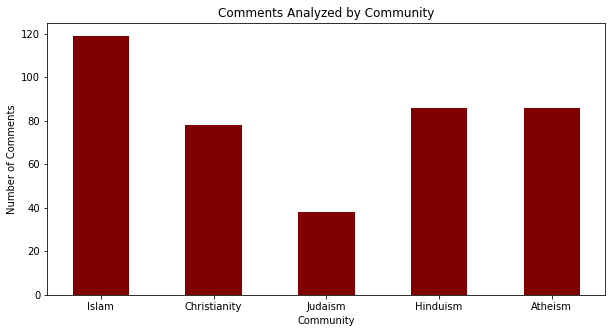

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Islam':119, 'Christianity':78, 'Judaism':38, 'Hinduism':86,
        'Atheism':86}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.5)
 
plt.xlabel("Community")
plt.ylabel("Number of Comments")
plt.title("Comments Analyzed by Community")
plt.show()

Checking to see how the data looks

In [43]:
Hinduism

,body
0,"Namaste, thank you for the submission. Please ..."
1,AMAZING!!! I'M SO HAPPY GAMES ACCORDING TO HIN...
2,Looks amazing
3,Looks good. I would suggest you to add more we...
4,more power to you bro
...,...
82,Whoa! Looks great. Can’t wait to buy the game
83,Will this be for pc also?!!
84,Superb ❤️ !!!!! Loving it already .
85,Hey this looks so amazing!!!! I'll be waiting ...


Counting the word frequencies

In [47]:
import re
import string
import nltk

import pandas as pd

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

nltk.download('punkt')
nltk.download('stopwords')

STOP_WORDS = stopwords.words()

def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)


    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text


if __name__ == "__main__":
    max_rows = 1000  # 'None' to read whole file

    dt = Islam['body'].apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(25)
    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    print(word_frequency)

          Word  Frequency
0       people         26
1       israel         23
2         like         14
3         dont         12
4         even         11
5        allah         10
6          may          9
7        years          9
8       anyone          8
9    palestine          8
10         see          8
11     israeli          8
12       would          8
13    peaceful          8
14        cant          7
15      muslim          7
16        help          6
17        need          6
18        guys          6
19       every          6
20        hate          6
21    religion          6
22      police          6
23        free          5
24  terrorists          5


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rab4h\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rab4h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:

STOP_WORDS = stopwords.words()

def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)


    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text


if __name__ == "__main__":
    max_rows = 1000  # 'None' to read whole file

    dt = Christianity['body'].apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(25)
    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    print(word_frequency)

         Word  Frequency
0         god         20
1        pray         16
2       bless         13
3    children         12
4        like         12
5         kid         11
6     missing         10
7      prayer          9
8      people          9
9     praying          8
10       kids          7
11         go          7
12       make          6
13       post          6
14       seen          6
15      thats          6
16  something          5
17     social          5
18        see          5
19      would          5
20        get          5
21      child          5
22        boy          5
23       good          5
24     little          5


In [53]:

STOP_WORDS = stopwords.words()

def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)


    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text


if __name__ == "__main__":
    max_rows = 1000  # 'None' to read whole file

    dt = Judaism['body'].apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(25)
    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    print(word_frequency)
    
    wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

            Word  Frequency
0         people          8
1           like          7
2           dont          6
3   antisemitism          5
4            day          5
5          posts          4
6           anti          4
7         israel          4
8           hate          4
9            say          3
10        reddit          3
11        jewish          3
12          isnt          3
13          even          3
14         would          3
15          days          3
16     downvoted          3
17    commenting          3
18     palestine          3
19         stand          3
20        report          3
21         going          3
22        notice          2
23          post          2
24      unfollow          2


In [8]:

STOP_WORDS = stopwords.words()

def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)


    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text


if __name__ == "__main__":
    max_rows = 1000  # 'None' to read whole file

    dt = Hinduism['body'].apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(25)
    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    print(word_frequency)

NameError: name 'Hinduism' is not defined

In [123]:

STOP_WORDS = stopwords.words()

def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)


    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text


if __name__ == "__main__":
    max_rows = 1000  # 'None' to read whole file

    dt = Atheism['body'].apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(25)
    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    print(word_frequency)

         Word  Frequency
0     chicken         22
1          bk         18
2      burger         16
3        king         15
4    sandwich         15
5        food         15
6        good         13
7   chickfila         11
8      people         11
9        like         10
10       dont          9
11      money          9
12      lgbtq          8
13        eat          8
14     donate          8
15      going          7
16        get          6
17       make          6
18    support          6
19    company          6
20      thats          6
21       hate          6
22       know          6
23      cause          6
24        new          6


Calculating the discussion sentiments

In [147]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# object gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	print("Overall sentiment dictionary is : ", sentiment_dict)
	print("discussion was rated as ", sentiment_dict['neg']*100, "% Negative")
	print("discussion was rated as ", sentiment_dict['neu']*100, "% Neutral")
	print("discussion was rated as ", sentiment_dict['pos']*100, "% Positive")

	print("Discussion Overall Rated As", end = " ")

	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		print("Positive")

	elif sentiment_dict['compound'] <= - 0.05 :
		print("Negative")

	else :
		print("Neutral")





In [148]:
Islam_comments = ', '.join(Islam.body)
sentiment_scores(Islam_comments)

Overall sentiment dictionary is :  {'neg': 0.196, 'neu': 0.674, 'pos': 0.13, 'compound': -0.9998}
discussion was rated as  19.6 % Negative
discussion was rated as  67.4 % Neutral
discussion was rated as  13.0 % Positive
Discussion Overall Rated As Negative


In [149]:
Christianity_comments = ', '.join(Christianity.body)
sentiment_scores(Christianity_comments)

Overall sentiment dictionary is :  {'neg': 0.111, 'neu': 0.629, 'pos': 0.261, 'compound': 0.9999}
discussion was rated as  11.1 % Negative
discussion was rated as  62.9 % Neutral
discussion was rated as  26.1 % Positive
Discussion Overall Rated As Positive


In [150]:
Judaism_comments = ', '.join(Judaism.body)
sentiment_scores(Judaism_comments)

Overall sentiment dictionary is :  {'neg': 0.144, 'neu': 0.719, 'pos': 0.137, 'compound': -0.948}
discussion was rated as  14.399999999999999 % Negative
discussion was rated as  71.89999999999999 % Neutral
discussion was rated as  13.700000000000001 % Positive
Discussion Overall Rated As Negative


In [151]:
Hinduism_comments = ', '.join(Hinduism.body)
sentiment_scores(Hinduism_comments)

Overall sentiment dictionary is :  {'neg': 0.04, 'neu': 0.642, 'pos': 0.318, 'compound': 1.0}
discussion was rated as  4.0 % Negative
discussion was rated as  64.2 % Neutral
discussion was rated as  31.8 % Positive
Discussion Overall Rated As Positive


In [152]:
Atheism_comments = ', '.join(Atheism.body)
sentiment_scores(Atheism_comments)

Overall sentiment dictionary is :  {'neg': 0.126, 'neu': 0.717, 'pos': 0.157, 'compound': 0.9983}
discussion was rated as  12.6 % Negative
discussion was rated as  71.7 % Neutral
discussion was rated as  15.7 % Positive
Discussion Overall Rated As Positive
